In [4]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pygsm
from pygsm import GlobalSkyModel

import ephem
from astropy.time import Time
from astropy.coordinates import Galactic, SkyCoord, FK5, EarthLocation, AltAz
import astropy.units as u

import pandas as pd

In [5]:
#Sidereal time calculation


Obs = ephem.Observer()
Obs.lon = '10.00'
Obs.date = '2003/5/9 16:15:00.000'

print(Obs.sidereal_time())

t = Time('2021-05-09 15:16:00.0000', scale='utc',location=('20', '0'))
lst = t.sidereal_time('apparent')
print(lst)
print(t.sidereal_time('apparent', 'greenwich'))

a = SkyCoord(ra = 120 *u.deg, dec= 40 *u.deg, frame = 'icrs')
print(a.transform_to(Galactic))

8:03:15.25
7h46m36.80619804s
6h26m36.80619872s
<SkyCoord (Galactic): (l, b) in deg
    (180.27745296, 29.60577826)>


In [6]:
#Healpy map of visible region of sky in a location at a time


gsm = GlobalSkyModel(freq_unit='GHz')


NPIX = hp.nside2npix(16)
print(NPIX)

spec = gsm.generate(2)
print(spec)
#plt.imshow(spec, vmin=-2.e-5, vmax=2.e-4)
#hp.mollview(spec, norm = None,vmin=-1e-6, vmax=1e-6)

spec = hp.pixelfunc.ud_grade(spec,16)
print(spec.shape)

def Visible_Sky(frequency):#, latitude, longitude, altitude, T):
    spectrum = gsm.generate(frequency)
    spectrum = hp.pixelfunc.ud_grade(spectrum, 16)
   # hp.visufunc.mollview(spectrum)

    i=1

    while i<NPIX:
        coords = hp.pixelfunc.pix2ang(16, i , nest = False, lonlat = True)
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')
    
        equi = gc.transform_to(AltAz(obstime = T, location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg, height=altitude*u.m)))

        if (equi.alt<0):
            spectrum[i-1] = -1.6375e+30
    
        i = i+1  
    

        
           
spectrum_value = Visible_Sky(2)#,10,10,200,"2022-05-15T12:00:00")

np.size(spectrum_value)
hp.mollview(spectrum_value(min=-1e-6, max=1e-6))

3072
[0.04005938 0.03894005 0.03734413 ... 0.03294453 0.03381297 0.03314329]
(3072,)


NameError: name 'T' is not defined

In [7]:
#Coordinate transformation

t = Time('2001-01-02T12:34:56')

t1 = t.ut1
print(t1)
gc = SkyCoord(l = 45*u.degree, b= 45*u.degree, frame = 'galactic')
print(gc)

#gc = SkyCoord(l = 45*u.degree, b= 45*u.degree, frame = 'galactic', equinox = 'B1950')
#print(gc)

radec1 = gc.transform_to(FK5(equinox = 'B2000'))
print(radec1)
radec2 = gc.transform_to(FK5(equinox = 'B1950'))
print(radec2)

Alt = radec1.transform_to(AltAz(obstime = '2001-01-02T12:34:56', location = EarthLocation(lat = 41.3*u.deg, lon=-74*u.deg, height=0*u.m)))
print(Alt)

Alt2 = Alt.transform_to(FK5(equinox = 'B1950'))
print(Alt2)



2001-01-02T12:34:56.092
<SkyCoord (Galactic): (l, b) in deg
    (45., 45.)>
<SkyCoord (FK5: equinox=B2000.000): (ra, dec) in deg
    (243.76172139, 27.00079808)>
<SkyCoord (FK5: equinox=B1950.000): (ra, dec) in deg
    (243.24854413, 27.12498657)>
<SkyCoord (AltAz: obstime=2001-01-02T12:34:56.000, location=(1322691.97697601, -4612775.10525862, 4187510.55271101) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (114.57095509, 63.76845192)>
<SkyCoord (FK5: equinox=B1950.000): (ra, dec) in deg
    (243.24854413, 27.12498657)>


/tmp/ipykernel_9356/2637061636.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(r'/home/dhashin/Downloads/total_spec_new.txt',sep= "    " ,header = None)


        Frequency     Intensity
0        0.009984  1.255914e-32
1        0.010003  1.258055e-32
2        0.010022  1.260196e-32
3        0.010041  1.262337e-32
4        0.010061  1.264478e-32
...           ...           ...
6835  4966.790300  2.870275e-33
6836  4976.331500  2.601257e-33
6837  4985.890900  2.353869e-33
6838  4995.468700  2.126862e-33
6839  5005.064900  1.918862e-33

[6840 rows x 2 columns]


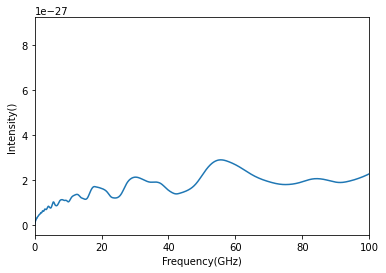

In [8]:
import pandas as pd

#a= np.loadtxt(r'/home/dhashin/Downloads/total_spec_new.dat')
df = pd.read_csv(r'/home/dhashin/Downloads/total_spec_new.txt',sep= "    " ,header = None)


df.reset_index(drop=True, inplace=True)
df.columns = ["Frequency","Intensity"]
print(df)

plt.plot(df["Frequency"],df["Intensity"])
plt.xlim(0,100)
plt.xlabel('Frequency(GHz)')
plt.ylabel('Intensity()')


plt.show()

In [9]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

x = df["Frequency"]
y= df["Intensity"]

ius = InterpolatedUnivariateSpline(x, y)



In [10]:
import numpy as np
import pandas as pd

from pygsm import GlobalSkyModel
import healpy as hp


import math
h = 6.62607157e-34
k = 1.3806488e-23
c = 2.99792458e+08
TCMB = 2.72548
T_Cold = 273
T_Hot = 373

def rj_to_CMB(freq):
    return (math.pow(h*freq/k*TCMB, 2) * math.exp(h*freq/k*TCMB))/(math.pow(math.exp(h*freq/k*TCMB) - 1, 2))  

gsm = GlobalSkyModel(freq_unit='GHz')
freqs = np.linspace(2, 4, 21)
spectrum = gsm.generate(freqs)
#print(spectrum.shape)
spectrum = hp.pixelfunc.ud_grade(spectrum, 16)
print(spectrum.shape)

df = pd.DataFrame(spectrum)
df = df.transpose()


df.columns = np.arange(2,4.1,0.1)

for column in df:
    df = (df * rj_to_CMB(float(column) *1000000000))
    
df = df + TCMB
print(type(df.columns[0]))

i = 0
CMB_Int = [None]*21 
P_Cold = [None]*21
P_Hot = [None]*21
P_Dif = [None]*21
P_Sky_mul_T = [None]*21
T_Sky = [None]*21
y_new = [None]*21

print(type(P_Dif))
while i<21:
    y_new[i] = ius(freqs[i])
   


    CMB_Int[i] = (2*h*math.pow(df.columns[i]*1e9,3.0)/(c*c*math.exp(h*df.columns[i]*1e9/k*TCMB)-1)) 
    P_Cold[i] = 0
    P_Hot[i] = 1
    P_Dif[i] = P_Hot[i]-P_Cold[i] 

    T_Sky[i] = CMB_Int[i]*100/P_Dif[i]


    i = i+1

print(P_Hot[0])
print(P_Cold[0])
print(type(y_new))
print(T_Sky)

(21, 3072)
<class 'numpy.float64'>
<class 'list'>
1
0
<class 'list'>
[9.080737647917299e-21, 1.0375483577080737e-20, 1.1774374012451249e-20, 1.3279221469799503e-20, 1.489162710309294e-20, 1.661298890354029e-20, 1.844450966772561e-20, 2.0387204740330672e-20, 2.2441909536826865e-20, 2.4609286851402196e-20, 2.688983395527587e-20, 2.9283889490442074e-20, 3.179164016377571e-20, 3.441312724632649e-20, 3.7148252882523374e-20, 3.999678621390888e-20, 4.295836932192296e-20, 4.603252299415721e-20, 4.921865231840476e-20, 5.2516052108736146e-20, 5.592391216773956e-20]


In [ ]:

j=0

while j<21:
    Intensity[i] = CMB_Int[j] + y_new[j]+ ((2*df.columns[j]*1e9*df.columns[j]*1e9*k*ctemp)/(c*c))*(c*c/df.columns[j]*df.columns[j])  
    final_temp = (Intensity / P_Dif)* (T_Hot - T_Cold)

